# Import data

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# 5,332,153 rows × 3 columns
traindf, testdf = train_test_split(pd.read_csv('github_issues.csv').sample(n=530000), 
                                   test_size=.10, random_state=0)

#print out stats about shape of data
print('Train: {} rows {} columns'.format(traindf.shape[0],traindf.shape[1]))
print('Test: {} rows {} columns'.format(testdf.shape[0],testdf.shape[1]))

traindf.head()

Train: 477000 rows 3 columns
Test: 53000 rows 3 columns


,issue_url,issue_title,body
2934288,"""https://github.com/devpunks/snuggsi/issues/88""",chalk text font for <aside> example pane,as per a conversation with claudia. crayon cru...
871263,"""https://github.com/nuveo/prest/issues/179""",bug on windows platform using toml config files,in config.go file the class path instead of fi...
4466424,"""https://github.com/0todd0000/spm1dmatlab/issu...",effect size and power calculations,"hi todd, hope you are well! we have a phd stud..."
4264435,"""https://github.com/teodorpatras/SideMenuContr...",this application is modifying the autolayout e...,we have this issue with autolayout. when we tu...
4428171,"""https://github.com/handsontable/handsontable/...",autofill broken on merged cells,description what happens: an error in the cons...


In [6]:
train_body_raw = traindf.body.tolist()
train_title_raw = traindf.issue_title.tolist()

/home/richard/dev/Github-issues-summerizer/.env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


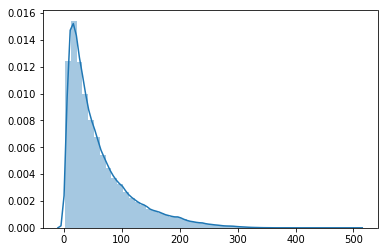

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot([len(body.split()) for body in train_body_raw])

/home/richard/dev/Github-issues-summerizer/.env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


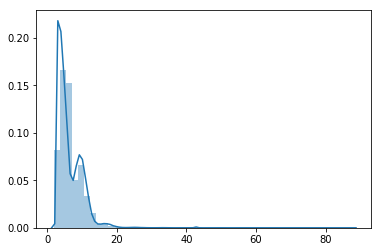

In [10]:
sns.distplot([len(title.split()) for title in train_title_raw])

# Preprocessing

#### For x (body)

In [16]:
from keras.preprocessing.text import Tokenizer

tk_body = Tokenizer()
tk_body.fit_on_texts(train_body_raw)
print('Found %s unique "words"' % len(tk_body.word_index))
tk_body.num_words = 10000
train_body_vecs = tk_body.texts_to_sequences(train_body_raw)

Found 1077932 unique "words"


In [17]:
from keras.preprocessing.sequence import pad_sequences
train_body_vecs = pad_sequences(train_body_vecs, 100)

#### For y (title)

In [14]:
tk_title = Tokenizer()
tk_title.fit_on_texts(train_title_raw)
print('Found %s unique "words"' % len(tk_title.word_index))

Found 191077 unique "words"


In [18]:
from Helpers import custom_pad_sequences

train_title_vecs, tk_title, _, _ = custom_pad_sequences(train_title_raw, 1000, 10)

tokenizing...
padding...


#### Save tokenizers and vecs to local

In [19]:
import dill as dpickle
import numpy as np

# Save the preprocessor
with open('tk_body.dpkl', 'wb') as f:
    dpickle.dump(tk_body, f)

with open('tk_title.dpkl', 'wb') as f:
    dpickle.dump(tk_title, f)

# Save the processed data
np.save('train_title_vecs.npy', train_title_vecs)
np.save('train_body_vecs.npy', train_body_vecs)